In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir("C:\\Users\\mohd mustakim")

In [4]:
df=pd.read_csv("ear_phone_return.csv")

In [5]:
df.head()

,Unnamed: 0,model,colours,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,0,boAt Airdopes 491 True Wireless Bluetooth Headset,"Spirit Lime, True Wireless",3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,1,boAt Airdopes 641 Bluetooth Headset,"Black Fusion, True Wireless",4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975
2,2,OnePlus Bullets Wireless Z Bluetooth Headset,"Black, In the Ear",4.4,257701,1999,2173,8,OnePlus,In the Ear,Black,174
3,3,OnePlus Bullets Wireless Z Bass Edition Blueto...,"Reverb Red, In the Ear",4.4,102096,1999,2173,8,OnePlus,In the Ear,Reverb Red,174
4,4,Mivi Collar Classic with Fast Charging Bluetoo...,"Black, In the Ear",4.0,802,999,2498,60,Mivi,In the Ear,Black,1499


In [6]:
del df['Unnamed: 0']

In [7]:
del df['colours']

In [13]:
rows,columns=df.shape

In [14]:
rows

723

In [15]:
columns

10

In [10]:
df.columns

Index(['model', 'ratings', 'reviews', 'selling_price(Rs)', 'actual_price(Rs)',
       'off(%)', 'brand', 'type', 'colour', 'discount'],
      dtype='object')

# Univariate

## brands with number of product

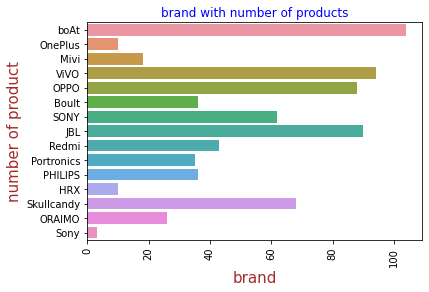

In [279]:
sns.countplot(y='brand',data=df)
plt.xticks(rotation=90)
plt.xlabel("brand",color='brown',size=15)
plt.ylabel("number of product",color='brown',size=15)
plt.title("brand with number of products",color='blue')
plt.show()

In [323]:
a=df["brand"].value_counts().reset_index()

In [324]:
a.head(2)

,index,brand
0,boAt,104
1,ViVO,94


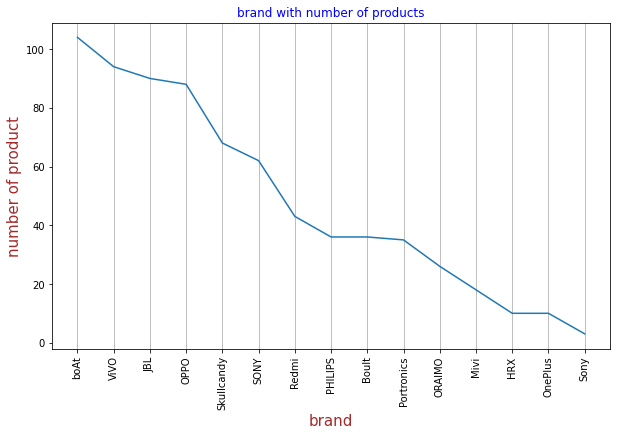

In [328]:
plt.figure(figsize=(10,6))
sns.lineplot(x='index',y='brand',data=a)
plt.title("brand with number of products",color='blue')
plt.xlabel("brand",color='brown',size=15)
plt.ylabel("number of product",color='brown',size=15)
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

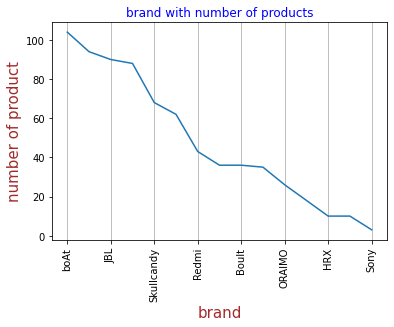

In [327]:
df["brand"].value_counts().plot(kind="line")
plt.xticks(rotation=90)
plt.title("brand with number of products",color='blue')
plt.xlabel("brand",color='brown',size=15)
plt.ylabel("number of product",color='brown',size=15)
plt.grid(axis='x')
plt.show()

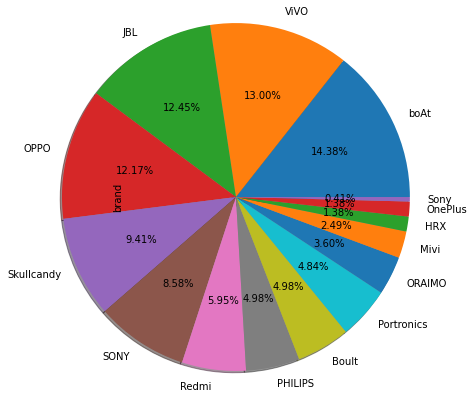

In [30]:
df["brand"].value_counts().plot(kind="pie",shadow = True,autopct='%1.2f%%',radius=2)
plt.show()
#plt.legend(title="brand")

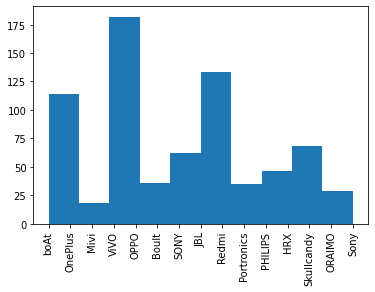

In [31]:
plt.hist(df["brand"])
plt.xticks(rotation=90)
plt.show() 

## ratings with number of products

<AxesSubplot:>

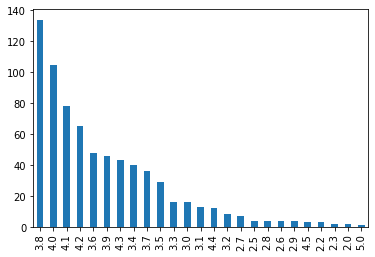

In [32]:
df['ratings'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ratings'>

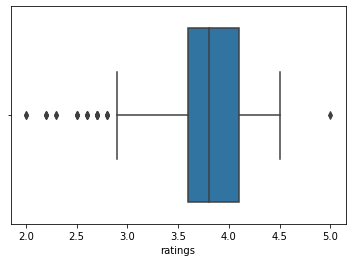

In [302]:
sns.boxplot(x=df['ratings'])

<AxesSubplot:>

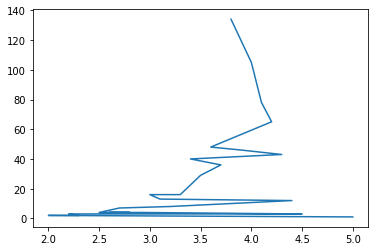

In [33]:
df['ratings'].value_counts().plot(kind='line')

<AxesSubplot:ylabel='ratings'>

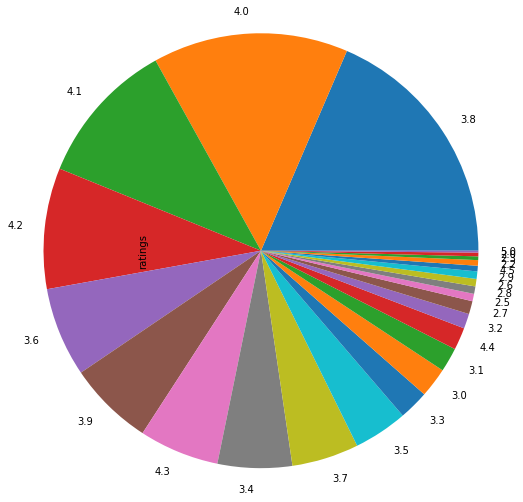

In [34]:
df['ratings'].value_counts().plot(kind='pie',radius=2.5)

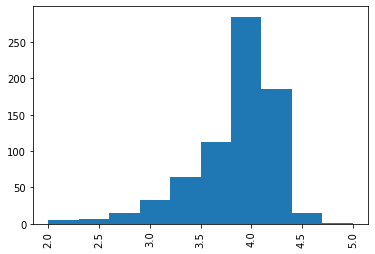

In [35]:
plt.hist(df["ratings"])
plt.xticks(rotation=90)
plt.show() 

## reviews with number of products

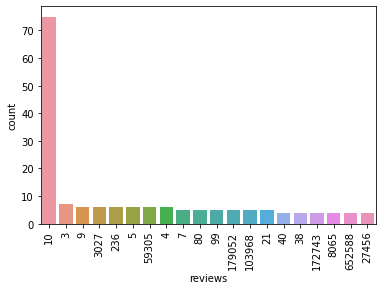

In [36]:
sns.countplot(x="reviews",data=df,order=df["reviews"].value_counts().index[0:20])
plt.xticks(rotation=90)
plt.show()

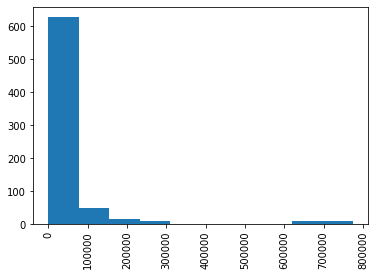

In [37]:
plt.hist(df["reviews"])
plt.xticks(rotation=90)
plt.show() 

<AxesSubplot:xlabel='reviews'>

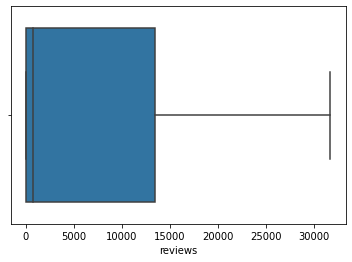

In [301]:
sns.boxplot(x=df['reviews'],showfliers=False)

## price with more number of products

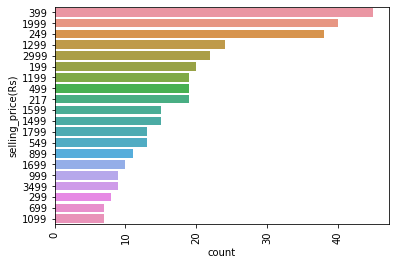

In [38]:
sns.countplot(y="selling_price(Rs)",data=df,order=df["selling_price(Rs)"].value_counts().index[0:20])
plt.xticks(rotation=90)
plt.show()
#df['selling_price(Rs)'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='selling_price(Rs)'>

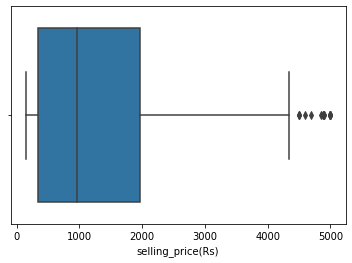

In [291]:
sns.boxplot(x='selling_price(Rs)',data=df)

<AxesSubplot:xlabel='selling_price(Rs)', ylabel='Count'>

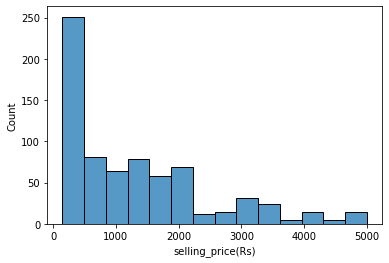

In [39]:
sns.histplot(df['selling_price(Rs)'])

## number of products with thier types

<AxesSubplot:xlabel='count', ylabel='type'>

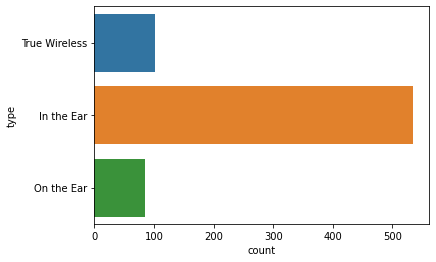

In [297]:
sns.countplot(y='type',data=df)

<AxesSubplot:>

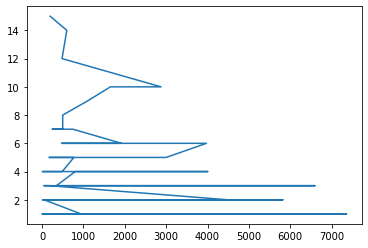

In [41]:
df["discount"].value_counts().plot(kind='line')

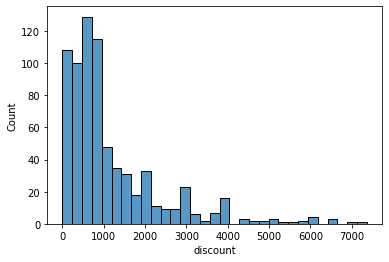

In [42]:
sns.histplot(df["discount"])
plt.show()

<AxesSubplot:ylabel='discount'>

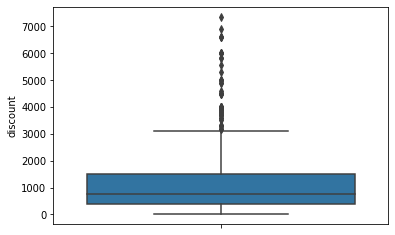

In [162]:
sns.boxplot(y=df['discount'],showfliers=True)

<AxesSubplot:ylabel='actual_price(Rs)'>

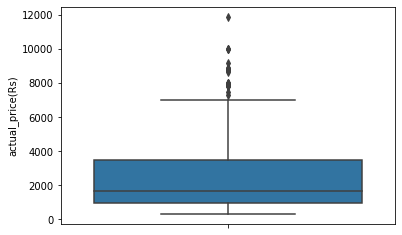

In [160]:
sns.boxplot(y=df['actual_price(Rs)'],showfliers=True)

In [47]:
df["discount"].max()

7361

### bivariate

In [76]:
df.head(2)

,model,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,boAt Airdopes 491 True Wireless Bluetooth Headset,3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,boAt Airdopes 641 Bluetooth Headset,4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975


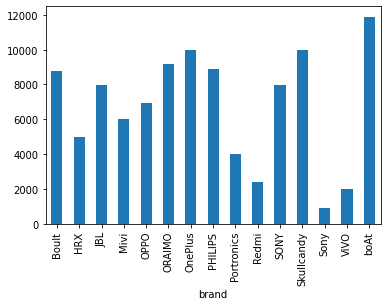

In [163]:
df.groupby(by=df['brand'])['actual_price(Rs)'].max().plot(kind='bar')
plt.show()

In [164]:
max_price=df.groupby(by=df['brand'])['actual_price(Rs)'].max().sort_values(ascending=False).reset_index()

In [ ]:
max_price.head(2)

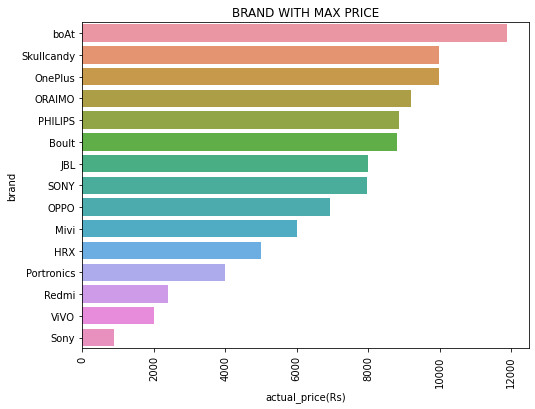

In [167]:
plt.figure(figsize=(8,6))
sns.barplot(y="brand",x="actual_price(Rs)",data=max_price)
plt.xticks(rotation=90)
plt.title("BRAND WITH MAX PRICE")
plt.show()

In [58]:
import plotly.graph_objects as go

In [59]:
fig=go.Figure(go.Bar(x=max_price["brand"],y=max_price["actual_price(Rs)"]))
fig.show()

NameError: name 'max_price' is not defined

In [ ]:
df.groupby(by=df['brand'])['actual_price(Rs)'].max().plot(kind='pie',radius=2)

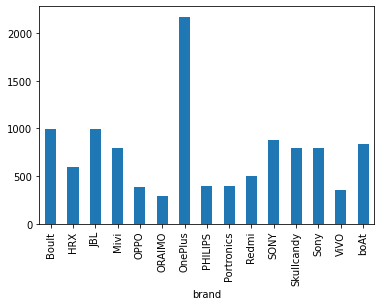

In [168]:
df.groupby(by=df['brand'])['actual_price(Rs)'].min().plot(kind='bar')
plt.show()

In [169]:
min_price=df.groupby(by=df['brand'])['actual_price(Rs)'].min().sort_values(ascending=False).reset_index()

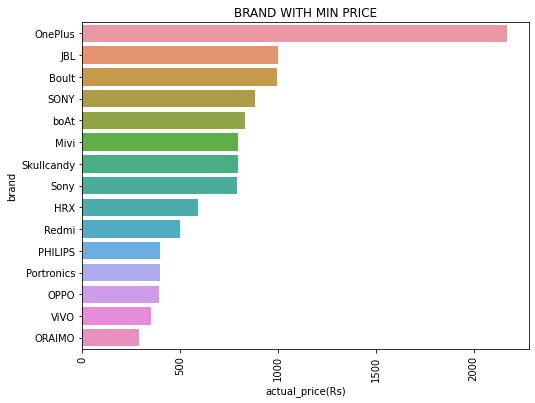

In [171]:
plt.figure(figsize=(8,6))
sns.barplot(y="brand",x="actual_price(Rs)",data=min_price)
plt.xticks(rotation=90)
plt.title("BRAND WITH MIN PRICE")
plt.show()

In [ ]:
fig=go.Figure(go.Bar(x=min_price["brand"],y=min_price["actual_price(Rs)"]))
fig.show()

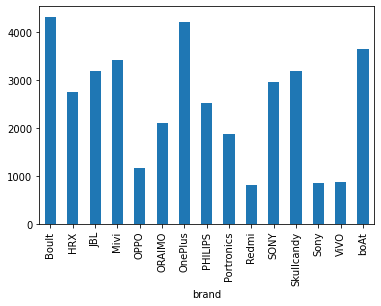

In [172]:
df.groupby(by=df['brand'])['actual_price(Rs)'].mean().plot(kind='bar')
plt.show()

In [173]:
avg_price=df.groupby(by=df['brand'])['actual_price(Rs)'].mean().sort_values(ascending=False).reset_index()

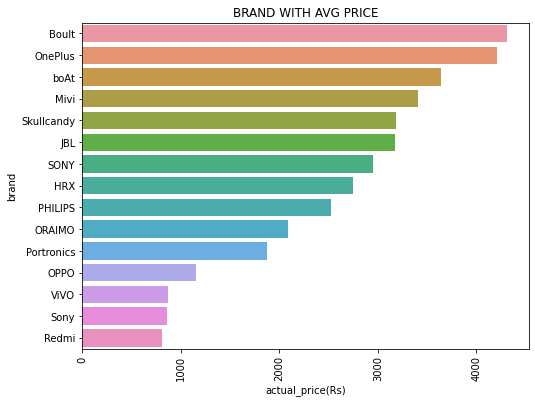

In [174]:
plt.figure(figsize=(8,6))
sns.barplot(y="brand",x="actual_price(Rs)",data=avg_price)
plt.xticks(rotation=90)
plt.title("BRAND WITH AVG PRICE")
plt.show()

In [60]:
fig=go.Figure(go.Bar(x=avg_price["brand"],y=avg_price["actual_price(Rs)"]))
fig.show()

NameError: name 'avg_price' is not defined

In [61]:
grp = df.groupby("brand").agg({"actual_price(Rs)":{"min", "max", "mean"}})
grp.columns =  ["_".join(col) for col in grp.columns]
grp = grp.reset_index()

In [62]:
grp

,brand,actual_price(Rs)_mean,actual_price(Rs)_max,actual_price(Rs)_min
0,Boult,4316.444444,8796,997
1,HRX,2751.000000,4998,591
2,JBL,3174.800000,7998,998
3,Mivi,3412.444444,5998,798
4,OPPO,1155.454545,6943,390
5,ORAIMO,2089.538462,9198,288
6,OnePlus,4210.000000,9980,2173
7,PHILIPS,2521.444444,8867,397
8,Portronics,1878.971429,3998,395
9,Redmi,808.720930,2399,498


In [65]:
fig = go.Figure()
# first I add a trace for every x
fig.add_trace(go.Scatter(x=grp["brand"],
                         y=grp["actual_price(Rs)_min"],
                         mode="markers",
                         showlegend=False,
                         marker=dict(color="yellow",
                                     size=10)))

fig.add_trace(go.Scatter(x=grp["brand"],
                         y=grp["actual_price(Rs)_mean"],
                         mode="markers",
                         showlegend=False,
                         marker=dict(color="blue",
                                     size=20)))

fig.add_trace(go.Scatter(x=grp["brand"],
                         y=grp["actual_price(Rs)_max"],
                         mode="markers",
                         showlegend=False,
                         marker=dict(color="red",
                                     size=10)))
# then I add a vertical line for 
# every x where y_min!=y_max
for i, row in grp.iterrows():
    if row["actual_price(Rs)_min"]!=row["actual_price(Rs)_max"]:
        fig.add_shape(
            dict(type="line",
                 x0=row["brand"],
                 x1=row["brand"],
                 y0=row["actual_price(Rs)_min"],
                 y1=row["actual_price(Rs)_max"],
                 line=dict(
                   color="blue",
                   width=2)
                )
        )
fig.update_layout(title="Avg-Max-Min Actual_price(Rs)", title_x=0.5)
fig.show()

In [156]:
df.head(2)

,model,colours,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,boAt Airdopes 491 True Wireless Bluetooth Headset,"Spirit Lime, True Wireless",3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,boAt Airdopes 641 Bluetooth Headset,"Black Fusion, True Wireless",4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975


In [267]:
type_brand=df.groupby(by=df['model'])['actual_price(Rs)','type','brand'].max().sort_values(ascending=False,by='actual_price(Rs)').head(10)

C:\Users\mohd mustakim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



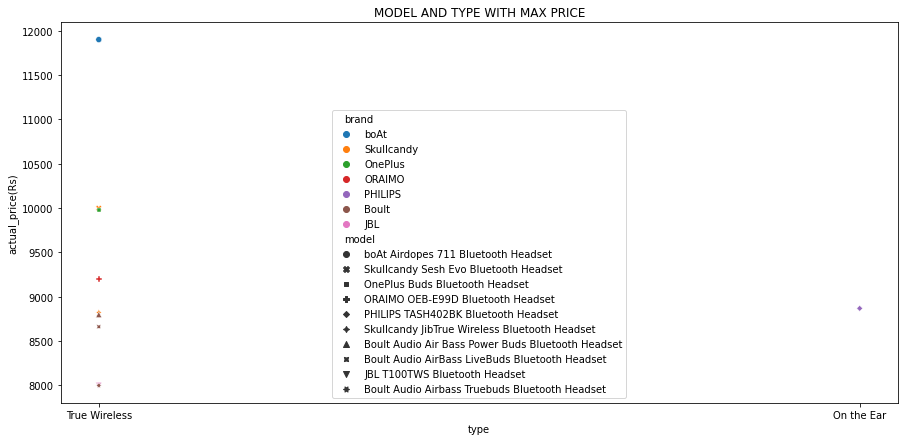

In [277]:
plt.figure(figsize=(15,7))
sns.scatterplot(y="actual_price(Rs)",x="type",data=type_brand,hue='brand',style="model",legend="full")
plt.xticks(rotation=0)
plt.title("MODEL AND TYPE WITH MAX PRICE")
plt.show()

In [ ]:
sns.relplot(
    data=type_brand, x="type", y="actual_price(Rs)",
    col="type", hue="type", style="type",
    kind="scatter")

In [216]:
type_model.head()

,actual_price(Rs),type
model,,
boAt Airdopes 711 Bluetooth Headset,11902,True Wireless
Skullcandy Sesh Evo Bluetooth Headset,9998,True Wireless
OnePlus Buds Bluetooth Headset,9980,True Wireless
ORAIMO OEB-E99D Bluetooth Headset,9198,True Wireless
PHILIPS TASH402BK Bluetooth Headset,8867,On the Ear


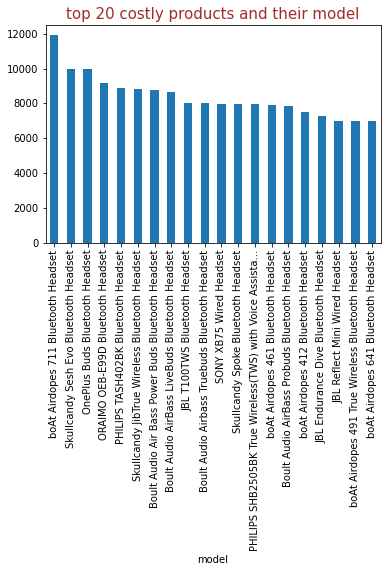

In [155]:
model_max_price=df.groupby(by=df['model'])['actual_price(Rs)'].max().sort_values(ascending=False)
model_max_price.head(20).plot(kind='bar')
plt.title('top 20 costly products and their model',color='brown',size=15)
plt.show()

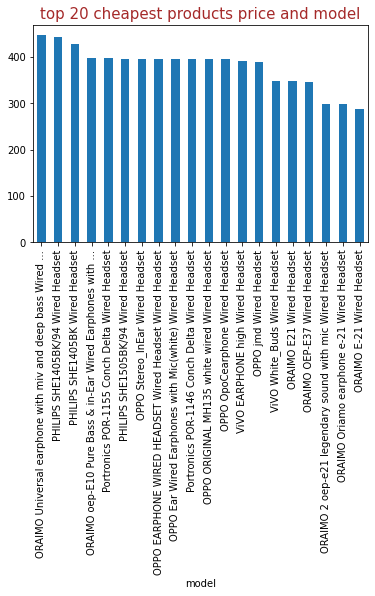

In [153]:
model_min_price=df.groupby(by=df['model'])['actual_price(Rs)'].max().sort_values(ascending=False)
model_min_price.tail(20).plot(kind='bar')
plt.title('top 20 cheapest products price and model',color='brown',size=15)
plt.show()

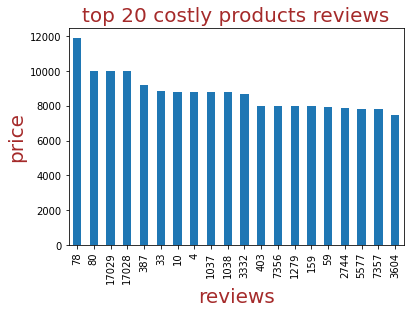

In [188]:
model_max_price_reviews=df.groupby(by=df['reviews'])['actual_price(Rs)'].max().sort_values(ascending=False)
model_max_price_reviews.head(20).plot(kind='bar')
plt.title('top 20 costly products reviews',color='brown',size=20)
plt.ylabel('price',color='brown',size=20)
plt.xlabel('reviews',color='brown',size=20)
plt.show()

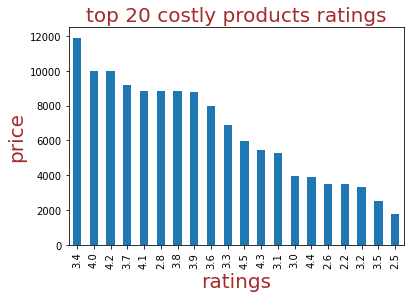

In [187]:
model_max_price_ratings=df.groupby(by=df['ratings'])['actual_price(Rs)'].max().sort_values(ascending=False)
model_max_price_ratings.head(20).plot(kind='bar')
plt.title('top 20 costly products ratings',color='brown',size=20)
plt.ylabel('price',color='brown',size=20)
plt.xlabel('ratings',color='brown',size=20)
plt.show()

In [200]:
df.groupby(by=df['type'])['actual_price(Rs)'].max().sort_values(ascending=False)

type
True Wireless    11902
On the Ear        8867
In the Ear        7980
Name: actual_price(Rs), dtype: int64

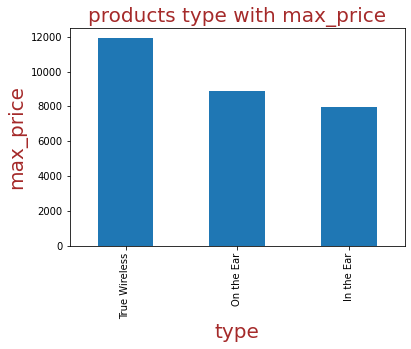

In [202]:
model_max_price_type=df.groupby(by=df['type'])['actual_price(Rs)'].max().sort_values(ascending=False)
model_max_price_type.plot(kind='bar')
plt.title('products type with max_price',color='brown',size=20)
plt.ylabel('max_price',color='brown',size=20)
plt.xlabel('type',color='brown',size=20)
plt.show()

In [189]:
df.head(2)

,model,colours,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,boAt Airdopes 491 True Wireless Bluetooth Headset,"Spirit Lime, True Wireless",3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,boAt Airdopes 641 Bluetooth Headset,"Black Fusion, True Wireless",4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975


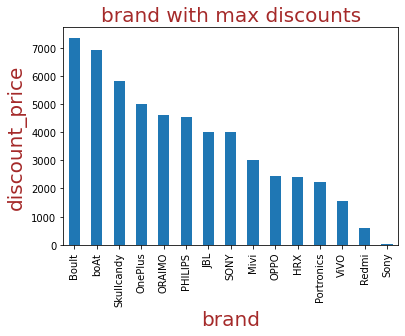

In [198]:
brand_max_discount=df.groupby(by=df['brand'])['discount'].max().sort_values(ascending=False)
brand_max_discount.head(20).plot(kind='bar')
plt.title('brand with max discounts',color='brown',size=20)
plt.ylabel('discount_price',color='brown',size=20)
plt.xlabel('brand',color='brown',size=20)
plt.show()

In [16]:
df.head()

,model,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,boAt Airdopes 491 True Wireless Bluetooth Headset,3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,boAt Airdopes 641 Bluetooth Headset,4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975
2,OnePlus Bullets Wireless Z Bluetooth Headset,4.4,257701,1999,2173,8,OnePlus,In the Ear,Black,174
3,OnePlus Bullets Wireless Z Bass Edition Blueto...,4.4,102096,1999,2173,8,OnePlus,In the Ear,Reverb Red,174
4,Mivi Collar Classic with Fast Charging Bluetoo...,4.0,802,999,2498,60,Mivi,In the Ear,Black,1499


In [41]:
df1=df[['brand','model']]
df1

,brand,model
0,boAt,boAt Airdopes 491 True Wireless Bluetooth Headset
1,boAt,boAt Airdopes 641 Bluetooth Headset
2,OnePlus,OnePlus Bullets Wireless Z Bluetooth Headset
3,OnePlus,OnePlus Bullets Wireless Z Bass Edition Blueto...
4,Mivi,Mivi Collar Classic with Fast Charging Bluetoo...
...,...,...
718,Portronics,"Portronics Muffs Pro, POR-645 Bluetooth withou..."
719,Skullcandy,Skullcandy S2DUY-L102 Wired Headset
720,Skullcandy,Skullcandy Jib Plus Active Sport Wireless Blue...
721,PHILIPS,PHILIPS SHB4305WT Bluetooth Headset


In [49]:
df1=df1.set_index('brand')

In [51]:
g=df1.groupby('brand')

In [66]:
for brand,model in g:
    print(brand)
    print(model)

Boult
                                                   model
brand                                                   
Boult              Boult Audio Bass Bud Q2 Wired Headset
Boult  Boult Audio Air Bass Power Buds Bluetooth Headset
Boult            Boult Audio BassBuds Loop Wired Headset
Boult   Boult Audio Air Bass Free Pods Bluetooth Headset
Boult  Boult Audio ProBass Curve Neckband Bluetooth H...
Boult      Boult Audio AirBass Combuds Bluetooth Headset
Boult   Boult Audio Pro Bass Curve Pro Bluetooth Headset
Boult   Boult Audio Air Bass Free Pods Bluetooth Headset
Boult  Boult Audio ProBass Curve Neckband Bluetooth H...
Boult       Boult Audio ProBass Flow X Bluetooth Headset
Boult       Boult Audio ProBass Flow X Bluetooth Headset
Boult              Boult Audio Thunder Bluetooth Headset
Boult      Boult Audio AirBass Combuds Bluetooth Headset
Boult           Boult Audio BassBuds Storm Wired Headset
Boult  Boult Audio Air Bass Power Buds Bluetooth Headset
Boult          Boult Audi

In [68]:
df.head(2)

,model,ratings,reviews,selling_price(Rs),actual_price(Rs),off(%),brand,type,colour,discount
0,boAt Airdopes 491 True Wireless Bluetooth Headset,3.6,751,2999,6974,57,boAt,True Wireless,Spirit Lime,3975
1,boAt Airdopes 641 Bluetooth Headset,4.2,28,2999,6974,57,boAt,True Wireless,Black Fusion,3975


In [73]:
i=df.groupby(df.model)['brand']

In [74]:
for brand,model_df in i:
    print(brand)
    print(model_df)

Boult Audio Air Bass Free Pods Bluetooth Headset
43    Boult
56    Boult
Name: brand, dtype: object
Boult Audio Air Bass Muse Buds Bluetooth Headset
165    Boult
Name: brand, dtype: object
Boult Audio Air Bass Power Buds Bluetooth Headset
23     Boult
110    Boult
322    Boult
Name: brand, dtype: object
Boult Audio AirBass Combuds Bluetooth Headset
51    Boult
78    Boult
Name: brand, dtype: object
Boult Audio AirBass LiveBuds Bluetooth Headset
211    Boult
Name: brand, dtype: object
Boult Audio AirBass Probuds Bluetooth Headset
118    Boult
202    Boult
Name: brand, dtype: object
Boult Audio Airbass Truebuds Bluetooth Headset
136    Boult
307    Boult
Name: brand, dtype: object
Boult Audio Bass Bud Q2 Wired Headset
21    Boult
Name: brand, dtype: object
Boult Audio BassBuds Loop Wired Headset
31    Boult
Name: brand, dtype: object
Boult Audio BassBuds Oak Pure-Wood Wired Headset
153    Boult
Name: brand, dtype: object
Boult Audio BassBuds Storm Wired Headset
98     Boult
127    Boult


561    OPPO
Name: brand, dtype: object
OPPO MH-139 MODEL WITH MIC PACK OF 2 Wired Headset
220    OPPO
Name: brand, dtype: object
OPPO MODEL 009 WIRED HEADSET Wired Headset
191    OPPO
Name: brand, dtype: object
OPPO New stylist Bluetooth Headset
575    OPPO
Name: brand, dtype: object
OPPO OG Earphone Headphone Wired Headset
566    OPPO
Name: brand, dtype: object
OPPO OPPOA5S Wired, Wired Headset
585    OPPO
Name: brand, dtype: object
OPPO ORIGINAL 3.5MM COMBO PACK EARPHONE Wired Headset
356    OPPO
Name: brand, dtype: object
OPPO ORIGINAL MH135 white wired Wired Headset
447    OPPO
Name: brand, dtype: object
OPPO OpoCearphone Wired Headset
350    OPPO
Name: brand, dtype: object
OPPO Originol- Earphone-Headphone Wired Headset
295    OPPO
Name: brand, dtype: object
OPPO POGn Wired Headset
430    OPPO
Name: brand, dtype: object
OPPO R 91 g Wired Headset
580    OPPO
Name: brand, dtype: object
OPPO R11 WIRED EARPHONE FOR ALL SMART PHONES Wired Head...
623    OPPO
Name: brand, dtype: object


546    Redmi
Name: brand, dtype: object
REDMI YDJC01JY Wired Headset
217    Redmi
Name: brand, dtype: object
Redmi by Mi Hi-Resolution Audio Wired Headset
54    Redmi
95    Redmi
Name: brand, dtype: object
SONY 310AP Wired Headset
70     SONY
88     SONY
124    SONY
Name: brand, dtype: object
SONY AS210AP SPORTS Wired Headset
240    SONY
Name: brand, dtype: object
SONY C400 Bluetooth Headset
29     SONY
104    SONY
259    SONY
323    SONY
357    SONY
Name: brand, dtype: object
SONY C400BluetoothBlack Bluetooth Headset
545    SONY
Name: brand, dtype: object
SONY EX14AP Wired Headset
123    SONY
132    SONY
Name: brand, dtype: object
SONY EX155 Wired Headset
246    SONY
251    SONY
Name: brand, dtype: object
SONY EX155AP Wired Headset
245    SONY
423    SONY
Name: brand, dtype: object
SONY EX15AP Wired Headset
235    SONY
355    SONY
Name: brand, dtype: object
SONY EX15AP Wired without Mic Headset
298    SONY
483    SONY
Name: brand, dtype: object
SONY EX15LP Wired without Mic Headset
45

685    boAt
717    boAt
Name: brand, dtype: object
boAt Airdopes 491 True Wireless Bluetooth Headset
0     boAt
80    boAt
Name: brand, dtype: object
boAt Airdopes 501 Bluetooth Headset
381    boAt
Name: brand, dtype: object
boAt Airdopes 631 Bluetooth Headset
279    boAt
Name: brand, dtype: object
boAt Airdopes 641 Bluetooth Headset
1     boAt
13    boAt
84    boAt
90    boAt
Name: brand, dtype: object
boAt Airdopes 711 Bluetooth Headset
715    boAt
Name: brand, dtype: object
boAt BassHeads 100 Chennai Super Kings Edition Wired He...
148    boAt
Name: brand, dtype: object
boAt BassHeads 100 Wired Headset
11    boAt
30    boAt
40    boAt
59    boAt
Name: brand, dtype: object
boAt BassHeads 172 Wired Headset
141    boAt
Name: brand, dtype: object
boAt BassHeads 182 Wired Headset
85     boAt
121    boAt
Name: brand, dtype: object
boAt BassHeads 220 Super Extra Bass Wired Headset
28     boAt
62     boAt
109    boAt
113    boAt
Name: brand, dtype: object
boAt BassHeads 220 Wired Headset
58